# MC866 Project 1

## PART I - Clustering Methods

## K-Means

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib
import math
import time
import matplotlib.cm as cm

In [2]:
class KMeans:
    def __init__(self, X, n_clusters=5, random_state=None):
        self.n_clusters = n_clusters
        self.X = X
        self.rand = np.random.RandomState(random_state)
        self.centroids = []

    def init_centroids(self):
        self.centroids = self.rand.permutation(self.X)[:self.n_clusters]

    def __distances_by_cluster(self, data=None):
        if data is None:
            data = self.X
         
        distances = np.array([])
        for c in self.centroids:
            def euclidian_distance(x): 
                sum = np.sum(np.apply_along_axis(lambda p: np.power(p[0] - p[1], 2), 1, np.column_stack((x, c)))) # sum of the square of the difference of each feature to the corresponding centroid feature
                return np.sqrt(sum) # sqrt the root to find the euclidian distance
            d = np.apply_along_axis(euclidian_distance, 1, data)
            distances = np.append(distances, d)
        distances = distances.reshape((self.n_clusters, len(data)))
        distances = distances.T # list of distances of each centroid to the element in the given index (equivalent to zip(*distances) but faster)
        return distances

    def elbow_sse(self):
        distances = self.__distances_by_cluster()
        distances = np.apply_along_axis(np.min, 1, distances) # get only the min distance for each data point (the distance the its centroid)
        distances = np.power(distances, 2)
        return distances.sum()

    def silhouette_coefficient(self):
        result = []

        cluster_centroid_distances = self.__distances_by_cluster(data=self.centroids) # calculates the distance between the centroids to each other

        for i in range(cluster_centroid_distances.shape[0]):
            cluster_centroid_distances[i][i] = np.inf # make the distance of the cluster to itself infinite
        closest_cluster = np.apply_along_axis(np.argmin, 1, cluster_centroid_distances) # contains index of the cluster closest to the one in the array index
        clusters = self.clusters() # the cluster classification for each row of data
        for i in range(len(self.centroids)): # will calculate metrics from each cluster's perspective
            result.append([])
            closest_cluster_data = self.X[clusters == closest_cluster[i]] # filter only data that belongs to the closest cluster
            cluster_data = self.X[clusters == i] # filter only data from the current cluster
            # for each row of data in the cluster, we'll calculate the silhouette coefficient
            for row in cluster_data:
                # get the distances between the current data point and all the other points inside the same cluster
                inside_distances = np.apply_along_axis(lambda x: np.sqrt(np.sum(np.apply_along_axis(lambda p: np.power(p[0] - p[1], 2), 1, np.column_stack((x, row))))) , 1, cluster_data)
                # get the distances between the current data point and the other points inside the closest cluster
                closest_cluster_distances = np.apply_along_axis(lambda x: np.sqrt(np.sum(np.apply_along_axis(lambda p: np.power(p[0] - p[1], 2), 1, np.column_stack((x, row))))) , 1, closest_cluster_data)

                a = np.mean(inside_distances)
                b = np.mean(closest_cluster_distances)
                s = (b-a)/(max(a, b))
                result[i].append(s)

        return result

    # returns an array of what cluster each point of the dataset belongs to
    def clusters(self, data=None):
        distances = self.__distances_by_cluster(data=data)
        return np.apply_along_axis(np.argmin, 1, distances) # the index of which centroid each data point belongs to

    # Move the centroids to their cluster centers until convergence
    def fit(self):
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            clusters = self.clusters()
            changed = False
            for i in range(0, len(self.centroids)):
                data_filter = clusters == i
                filtered_data = self.X[data_filter] # only data that belongs to the cluster
                avg = np.sum(filtered_data, axis=0)
                avg = np.apply_along_axis(lambda x: x/filtered_data.shape[0], 0, avg)
                
                for j in range (0, avg.shape[0]):
                    if self.centroids[i][j] != avg[j]:
                        changed = True
                        self.centroids[i][j] = avg[j]
            if not changed:
                break
        
        print(f"converged in {iterations} iterations")
        print("--- %s seconds ---" % (time.time() - start_time))




### The Dataset
First we will run tests using the provided 2d dataset, splitting it in 90% for training and 10% for test.

Afterwards we'll run the same proccess on another dataset with more dimensions.

In [3]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

msk = np.random.rand(len(df)) < 0.9 # split dataset (90% train and 10% test)

df_train = df[msk]
df_test = df[~msk]

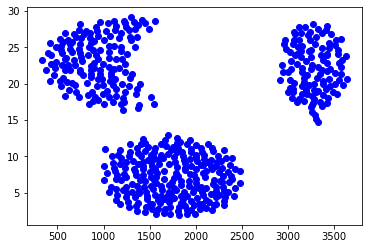

In [4]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="blue") # the data
plt.show()

By observing the visualization of the dataset, we can verify that 3 clusters would be adequate.

In [5]:
k = KMeans(X=df_train.to_numpy(), n_clusters=3)

The centroids are initialy positioned at random points of the dataset provided for training.

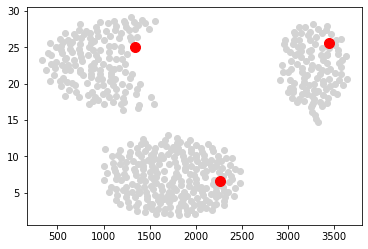

In [6]:
# initialize centroids and show their initial position in the chart
k.init_centroids()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

We use the clusters method to get to which centroid each data point is closest to

In [7]:
k.clusters()

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Initially without any fitting, the clusters provided are the following

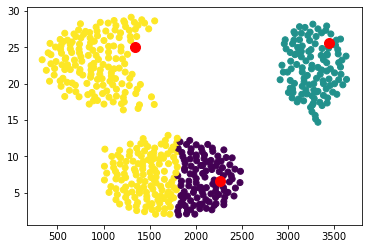

In [8]:
# Result of clusters before any fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [9]:
k.fit()

converged in 7 iterations
--- 0.7898588180541992 seconds ---


### Results after fitting with the raw training data

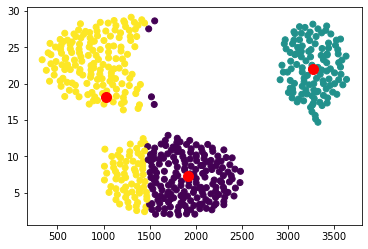

In [10]:
# Result of clusters after fitting is done

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

As we can observe, we have a problem regarding the data normalization. Since the scale of the X axis of the chart is much larger than the Y axis. That inflates the euclidian distance in the X direction, so we get results that would not be intuitively expected.

### Normalizing the data
To solve that issue, we will normalize the data to fit in the interval \[0, 1\]

In [11]:
max_values = df_train.max()
df_train = df_train / max_values
df_test = df_test / max_values
df_train.head()

,0,1
0,0.427785,0.982847
1,0.409904,0.945111
2,0.397524,0.972556
3,0.389271,0.987993
4,0.378267,0.962264


Then we'll run the kmeans operation again and check the results

converged in 4 iterations
--- 0.4336881637573242 seconds ---


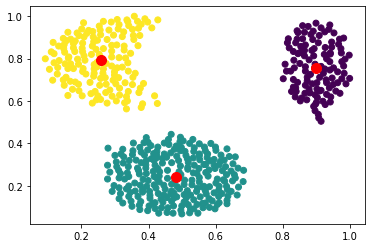

In [12]:
k = KMeans(X=df_train.to_numpy(), n_clusters=3)
k.init_centroids()
k.fit()

c = k.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1],k.centroids[:,1:], c="red", s=100) # the data
plt.show()

From this we can observe the importance of data normalization when using kmeans for clustering data. Now we can observe that the expected intuitive result was achieved, so we will validate the results with the test data.

## Checking the test data distribution

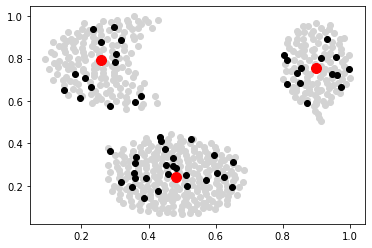

In [13]:
# the test data
fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c="black") # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

## How the test data was classified using the prefitted kmeans model

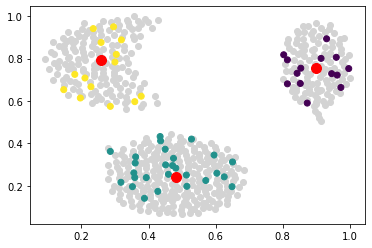

In [14]:
c = k.clusters(data=df_test.to_numpy())

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(df_test.iloc[:,:1].values, df_test.iloc[:,1:].values, c=c) # the data
ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

### Metrics

Now we will verify the results using a few metrics.

### The Elbow Method
We'll run the kmeans algorithm with different amounts of clusters and get the sum of the squared distance of each point of a cluster to it's centroid. 

converged in 2 iterations
--- 0.07887578010559082 seconds ---
converged in 8 iterations
--- 0.6245179176330566 seconds ---
converged in 5 iterations
--- 0.557682991027832 seconds ---
converged in 11 iterations
--- 1.6214897632598877 seconds ---
converged in 9 iterations
--- 1.6130681037902832 seconds ---
converged in 9 iterations
--- 1.9331929683685303 seconds ---
converged in 18 iterations
--- 4.129510164260864 seconds ---
converged in 12 iterations
--- 2.971994161605835 seconds ---
converged in 16 iterations
--- 4.436134338378906 seconds ---


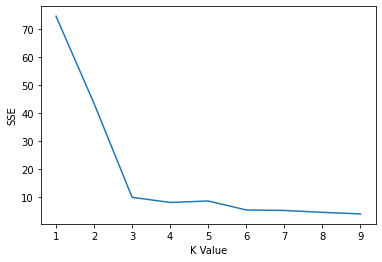

In [15]:
sse_values = []
cluster_range = range (1, 10)
for i in range (1, 10):
    k = KMeans(X=df_train.to_numpy(), n_clusters=i)
    k.init_centroids()
    k.fit()
    sse_values.append(k.elbow_sse())
    
fig, ax = plt.subplots()
ax.plot(cluster_range, sse_values) # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
ax.set_xlabel("K Value")
ax.set_ylabel("SSE")
plt.show()


With the elbow method we can easily verify that 3 clusters intuitively chosen really is the optimal amount. 

converged in 7 iterations
--- 0.4948301315307617 seconds ---
For 2 clusters, got silhouette score of 0.5149350788685255
converged in 3 iterations
--- 0.28691816329956055 seconds ---
For 3 clusters, got silhouette score of 0.7100424694705456
converged in 29 iterations
--- 3.598512887954712 seconds ---
For 4 clusters, got silhouette score of 0.5250929223955266
converged in 8 iterations
--- 1.254436731338501 seconds ---
For 5 clusters, got silhouette score of 0.6270582593560887
converged in 11 iterations
--- 2.126955986022949 seconds ---
For 6 clusters, got silhouette score of 0.5079999691868307
converged in 15 iterations
--- 3.559346914291382 seconds ---
For 7 clusters, got silhouette score of 0.5017776427033773
converged in 15 iterations
--- 4.190312147140503 seconds ---
For 8 clusters, got silhouette score of 0.46599676407665325
converged in 13 iterations
--- 3.8501551151275635 seconds ---
For 9 clusters, got silhouette score of 0.4505303042454964


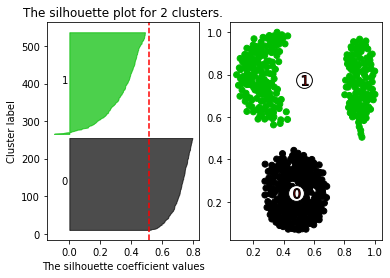

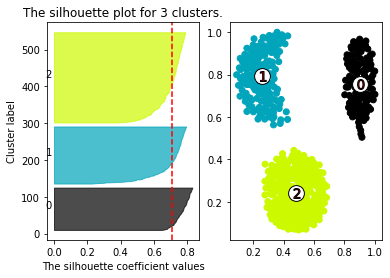

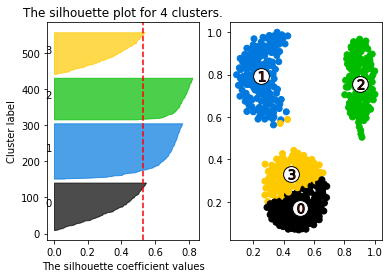

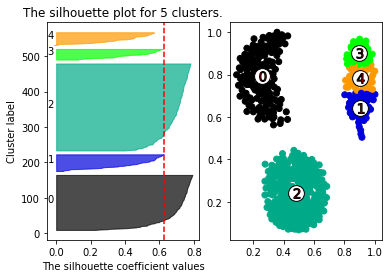

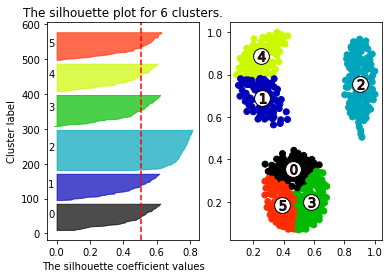

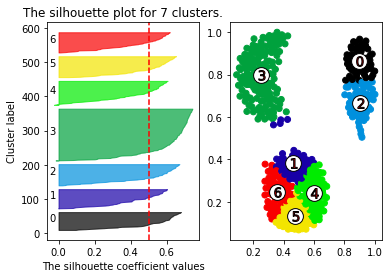

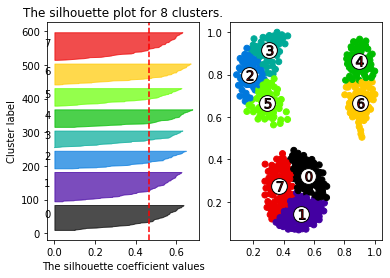

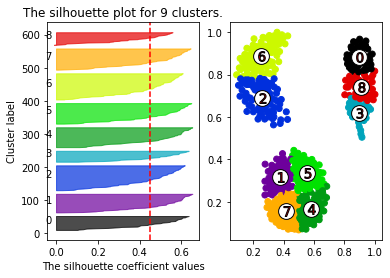

In [29]:
for num_clusters in range (2, 10):
    k = KMeans(X=df_train.to_numpy(), n_clusters=num_clusters)
    k.init_centroids()
    k.fit()
    s = k.silhouette_coefficient()
    flat_s = [item for sublist in s for item in sublist]
    silhouette_avg = np.average(np.array(flat_s))
    print(f"For {num_clusters} clusters, got silhouette score of {silhouette_avg}")

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_values = s[i]
        ith_cluster_values.sort()
        size_cluster_i = len(ith_cluster_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title(f"The silhouette plot for {num_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    silhouette_avg = np.average(np.array(flat_s))
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    c = k.clusters()
    colors = cm.nipy_spectral(c.astype(float) / num_clusters)
    ax2.scatter(df_train.iloc[:, 0].values, df_train.iloc[:, 1].values, c=colors) # the data
    ax2.scatter(k.centroids[:, 0], k.centroids[:, 1], marker='o', c="white", alpha=1, s=250, edgecolor='k')
    for i, c in enumerate(k.centroids):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, s=100, alpha=1, edgecolor='k', c='red')

plt.show()

### Applying PCA

In [17]:
pca = decomposition.PCA(n_components=2)
pca.fit(df_train)
df_train_pca = pca.transform(df_train)

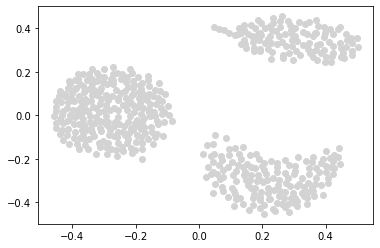

In [18]:
fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
# ax.scatter(k.centroids[:,:1], k.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [19]:
k_pca = KMeans(X=df_train_pca, n_clusters=3)
k_pca.init_centroids()

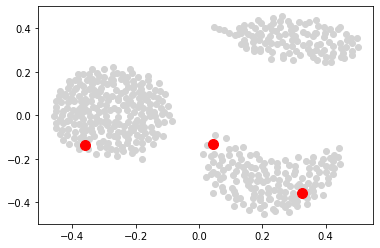

In [20]:
fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c="lightgray") # the data
ax.scatter(k_pca.centroids[:,:1], k_pca.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [21]:
k_pca.fit()

converged in 4 iterations
--- 0.42786312103271484 seconds ---


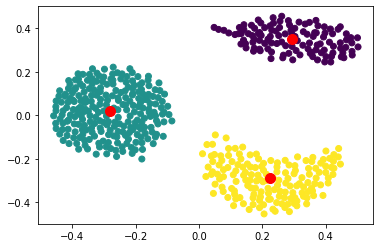

In [22]:
# Result of clusters after fitting is done

c = k_pca.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train_pca[:,:1], df_train_pca[:,1:], c=c) # the data
ax.scatter(k_pca.centroids[:,:1],k_pca.centroids[:,1:], c="red", s=100) # the data
plt.show()